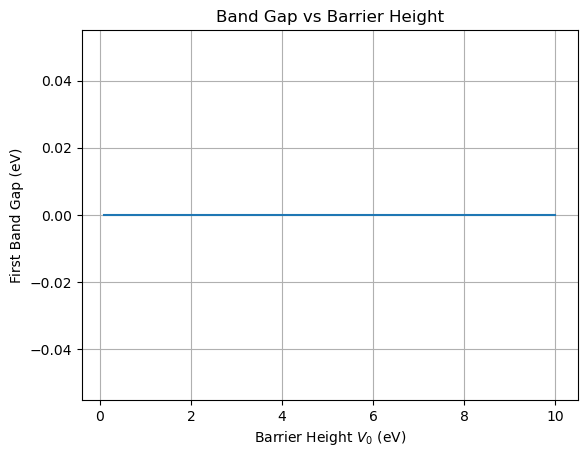

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
hbar = 1.0545718e-34
m = 9.10938356e-31
eV = 1.60218e-19
a = 1.5e-10
b = 1.0e-10
L = a + b

V0s = np.linspace(0.1, 10, 50)
gaps = []

for V0 in V0s:
    V0_J = V0 * eV
    E = np.linspace(0.01, V0 - 0.01, 500) * eV
    alpha = np.sqrt(2 * m * E) / hbar
    beta = np.sqrt(2 * m * (V0_J - E)) / hbar
    lhs = np.cos(alpha * a) * np.cosh(beta * b) - ((beta**2 - alpha**2) / (2 * alpha * beta)) * np.sin(alpha * a) * np.sinh(beta * b)
    allowed = np.abs(lhs) <= 1
    edges = E[1:][allowed[1:] & ~allowed[:-1]]
    gap = (edges[1] - edges[0]) / eV if len(edges) >= 2 else 0
    gaps.append(gap)

plt.plot(V0s, gaps)
plt.xlabel('Barrier Height $V_0$ (eV)')
plt.ylabel('First Band Gap (eV)')
plt.title('Band Gap vs Barrier Height')
plt.grid(True)
plt.show()

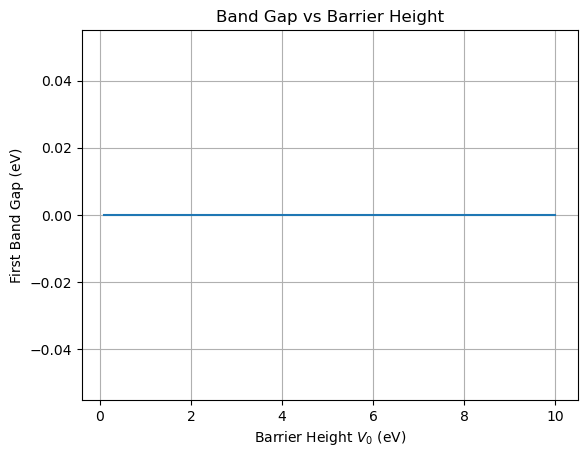

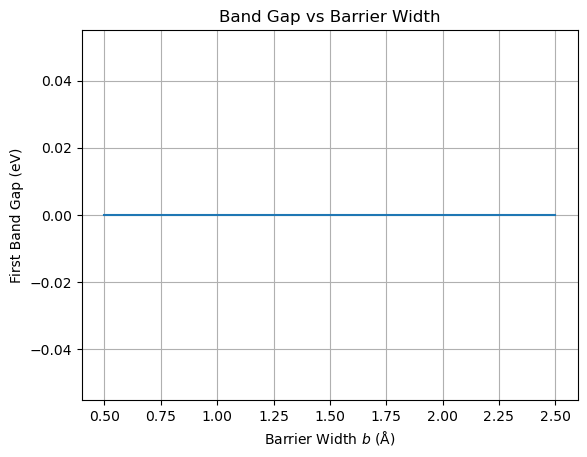

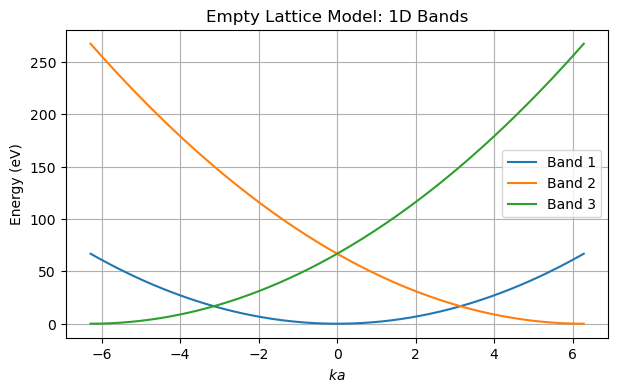

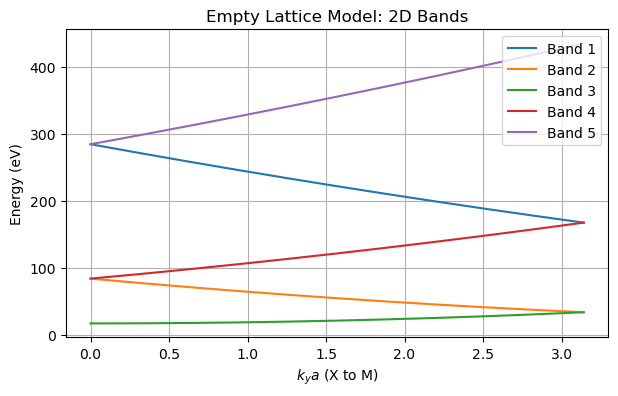

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
hbar = 1.0545718e-34
m = 9.10938356e-31
eV = 1.60218e-19
a = 1.5e-10
b = 1.0e-10
L = a + b

V0s = np.linspace(0.1, 10, 50)
gaps = []

for V0 in V0s:
    V0_J = V0 * eV
    E = np.linspace(0.01, V0 - 0.01, 500) * eV
    alpha = np.sqrt(2 * m * E) / hbar
    beta = np.sqrt(2 * m * (V0_J - E)) / hbar
    lhs = np.cos(alpha * a) * np.cosh(beta * b) - ((beta**2 - alpha**2) / (2 * alpha * beta)) * np.sin(alpha * a) * np.sinh(beta * b)
    allowed = np.abs(lhs) <= 1
    edges = E[1:][allowed[1:] & ~allowed[:-1]]
    gap = (edges[1] - edges[0]) / eV if len(edges) >= 2 else 0
    gaps.append(gap)

plt.plot(V0s, gaps)
plt.xlabel('Barrier Height $V_0$ (eV)')
plt.ylabel('First Band Gap (eV)')
plt.title('Band Gap vs Barrier Height')
plt.grid(True)
plt.show()


bvals = np.linspace(0.5e-10, 2.5e-10, 40)
gaps2 = []
V0 = 5
V0_J = V0 * eV

for b in bvals:
    E = np.linspace(0.01, V0 - 0.01, 500) * eV
    alpha = np.sqrt(2 * m * E) / hbar
    beta = np.sqrt(2 * m * (V0_J - E)) / hbar
    lhs = np.cos(alpha * a) * np.cosh(beta * b) - ((beta**2 - alpha**2) / (2 * alpha * beta)) * np.sin(alpha * a) * np.sinh(beta * b)
    allowed = np.abs(lhs) <= 1
    edges = E[1:][allowed[1:] & ~allowed[:-1]]
    gap = (edges[1] - edges[0]) / eV if len(edges) >= 2 else 0
    gaps2.append(gap)

plt.plot(bvals * 1e10, gaps2)
plt.xlabel('Barrier Width $b$ (Å)')
plt.ylabel('First Band Gap (eV)')
plt.title('Band Gap vs Barrier Width')
plt.grid(True)
plt.show()

k = np.linspace(-2 * np.pi / a, 2 * np.pi / a, 500)
E1 = (hbar**2 * k**2) / (2 * m) / eV
E2 = (hbar**2 * (k - 2 * np.pi / a)**2) / (2 * m) / eV
E3 = (hbar**2 * (k + 2 * np.pi / a)**2) / (2 * m) / eV

plt.figure(figsize=(7, 4))
plt.plot(k * a, E1, label='Band 1')
plt.plot(k * a, E2, label='Band 2')
plt.plot(k * a, E3, label='Band 3')
plt.xlabel(r'$ka$')
plt.ylabel('Energy (eV)')
plt.title('Empty Lattice Model: 1D Bands')
plt.legend()
plt.grid(True)
plt.show()



k_y = np.linspace(0, np.pi / a, 500)
kx = np.pi / a
bands = []

for n in range(-2, 3):
    ky_shift = k_y + n * 2 * np.pi / a
    E = (hbar**2 * (kx**2 + ky_shift**2)) / (2 * m) / eV
    bands.append(E)

plt.figure(figsize=(7, 4))
for i, E in enumerate(bands):
    plt.plot(k_y * a, E, label=f'Band {i+1}')
plt.xlabel(r'$k_y a$ (X to M)')
plt.ylabel('Energy (eV)')
plt.title('Empty Lattice Model: 2D Bands')
plt.legend()
plt.grid(True)
plt.show()

 


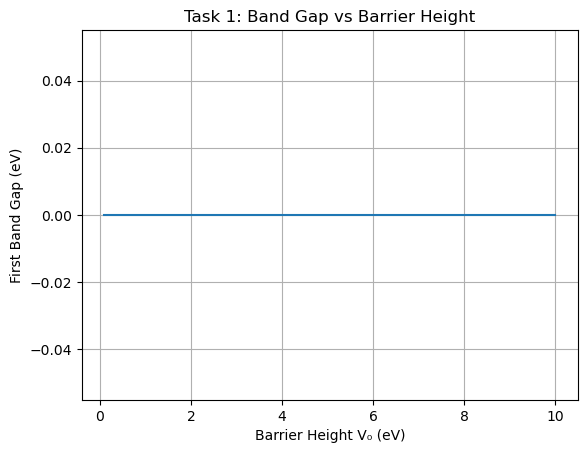

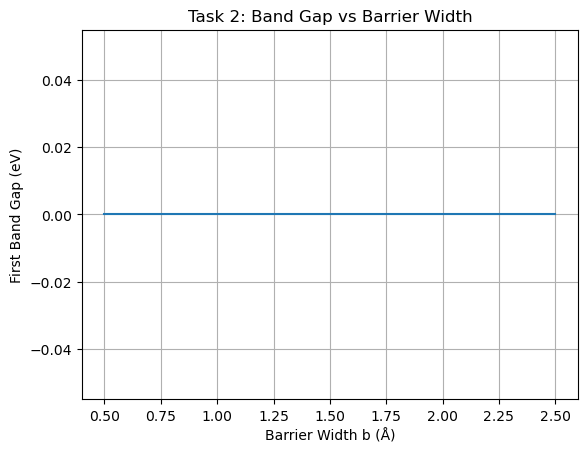

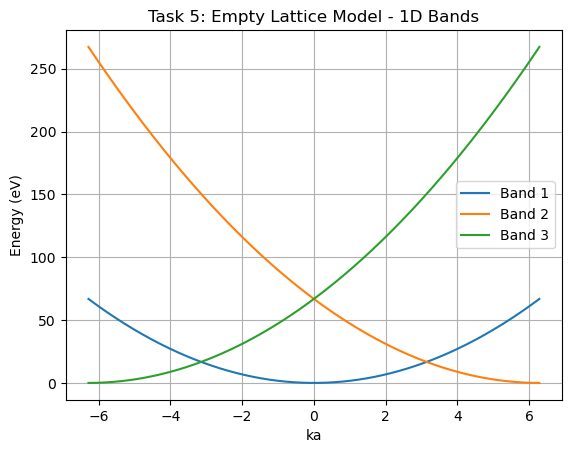

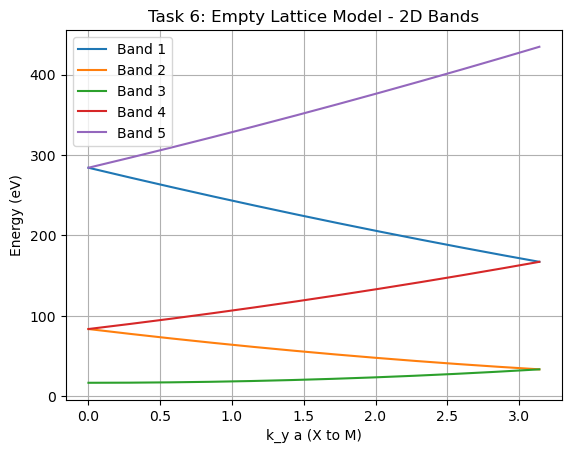

In [9]:
# ============================
# Task 1: Band Gap vs Barrier Height (Kronig-Penney Model)
# ============================

import numpy as np
import matplotlib.pyplot as plt

# Constants
hbar = 1.0545718e-34       # Reduced Planck constant (J·s)
m = 9.10938356e-31         # Electron mass (kg)
eV = 1.60218e-19           # Electron volt (J)
a = 1.5e-10                # Well width (meters)
b = 1.0e-10                # Barrier width (meters)
L = a + b                  # Lattice period

# Sweep barrier height V0 from 0.1 to 10 eV
V0s = np.linspace(0.1, 10, 50)
gaps = []

for V0 in V0s:
    V0_J = V0 * eV
    E = np.linspace(0.01, V0 - 0.01, 500) * eV
    alpha = np.sqrt(2 * m * E) / hbar
    beta = np.sqrt(2 * m * (V0_J - E)) / hbar
    lhs = np.cos(alpha * a) * np.cosh(beta * b) - ((beta**2 - alpha**2) / (2 * alpha * beta)) * np.sin(alpha * a) * np.sinh(beta * b)
    allowed = np.abs(lhs) <= 1
    edges = E[1:][allowed[1:] & ~allowed[:-1]]
    gap = (edges[1] - edges[0]) / eV if len(edges) >= 2 else 0
    gaps.append(gap)

# Plot band gap vs barrier height
plt.figure()
plt.plot(V0s, gaps)
plt.xlabel('Barrier Height V₀ (eV)')
plt.ylabel('First Band Gap (eV)')
plt.title('Task 1: Band Gap vs Barrier Height')
plt.grid(True)
plt.show()

# ============================
# Task 2: Band Gap vs Barrier Width
# ============================

bvals = np.linspace(0.5e-10, 2.5e-10, 40)
gaps2 = []
V0 = 5
V0_J = V0 * eV

for b in bvals:
    E = np.linspace(0.01, V0 - 0.01, 500) * eV
    alpha = np.sqrt(2 * m * E) / hbar
    beta = np.sqrt(2 * m * (V0_J - E)) / hbar
    lhs = np.cos(alpha * a) * np.cosh(beta * b) - ((beta**2 - alpha**2) / (2 * alpha * beta)) * np.sin(alpha * a) * np.sinh(beta * b)
    allowed = np.abs(lhs) <= 1
    edges = E[1:][allowed[1:] & ~allowed[:-1]]
    gap = (edges[1] - edges[0]) / eV if len(edges) >= 2 else 0
    gaps2.append(gap)

# Plot band gap vs barrier width
plt.figure()
plt.plot(bvals * 1e10, gaps2)
plt.xlabel('Barrier Width b (Å)')
plt.ylabel('First Band Gap (eV)')
plt.title('Task 2: Band Gap vs Barrier Width')
plt.grid(True)
plt.show()

# ============================
# Task 3: Amorphous Solids and Band Gaps
# ============================

# This task is theoretical: Amorphous solids lack long-range order but retain short-range atomic structure.
# Local potential variations still allow formation of band gaps, though bands are broader and less defined.

# ============================
# Task 4: Bragg Law and Zone Boundary Gaps
# ============================

# Bragg reflection occurs at zone boundaries (k = π/a), causing standing waves and opening band gaps.
# This is due to constructive interference of reflected electron waves.

# ============================
# Task 5: Empty Lattice Model - 1D Bands
# ============================

k = np.linspace(-2 * np.pi / a, 2 * np.pi / a, 500)
E1 = (hbar**2 * k**2) / (2 * m) / eV
E2 = (hbar**2 * (k - 2 * np.pi / a)**2) / (2 * m) / eV
E3 = (hbar**2 * (k + 2 * np.pi / a)**2) / (2 * m) / eV

# Plot first 3 bands in 1D empty lattice model
plt.figure()
plt.plot(k * a, E1, label='Band 1')
plt.plot(k * a, E2, label='Band 2')
plt.plot(k * a, E3, label='Band 3')
plt.xlabel('ka')
plt.ylabel('Energy (eV)')
plt.title('Task 5: Empty Lattice Model - 1D Bands')
plt.legend()
plt.grid(True)
plt.show()

# ============================
# Task 6: Empty Lattice Model - 2D Square Lattice (X to M)
# ============================

k_y = np.linspace(0, np.pi / a, 500)
kx = np.pi / a
bands = []

for n in range(-2, 3):
    ky_shift = k_y + n * 2 * np.pi / a
    E = (hbar**2 * (kx**2 + ky_shift**2)) / (2 * m) / eV
    bands.append(E)

# Plot 5 bands from X to M direction
plt.figure()
for i, E in enumerate(bands):
    plt.plot(k_y * a, E, label=f'Band {i+1}')
plt.xlabel('k_y a (X to M)')
plt.ylabel('Energy (eV)')
plt.title('Task 6: Empty Lattice Model - 2D Bands')
plt.legend()
plt.grid(True)
plt.show()



